In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
np.set_printoptions(threshold='nan', precision=6, suppress=True)

In [2]:
df_one = pd.read_csv('../output/expr_one.csv')
df_one.fillna("", inplace=True)

In [3]:
df_one.head()

,Nth,R,State,lambda,Aver_N,VN_Entropy,Helstrom,Chernoff,S_opt,A_N,B_N,ra,rb
0,0.1,0.01,TMSS,0.099504,0.020000,0.056102,0.495279,0.499957,0.500273,,,,
1,0.1,0.01,PS,0.099504,0.039804,0.168732,0.490605,0.499839,0.500273,,,,
2,0.1,0.01,PA,0.099504,1.039804,0.168732,0.485689,0.499632,0.498223,,,,
3,0.1,0.01,PSA,0.099504,0.150064,0.439049,0.481975,0.499450,0.500273,,,,
4,0.1,0.01,PAS,0.099504,1.150064,0.439049,0.474332,0.498892,0.499102,,,,


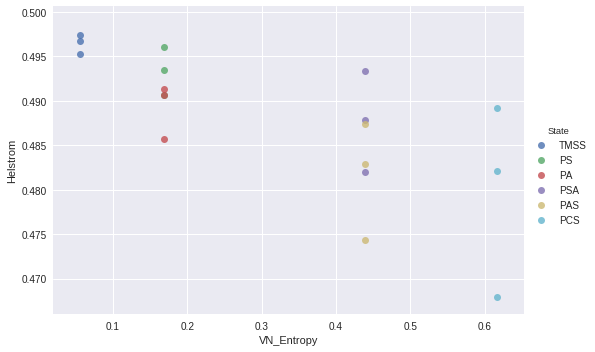

In [4]:
sns.lmplot(x='VN_Entropy', y='Helstrom', data=df_one, 
           hue='State', fit_reg=False, aspect=1.5)

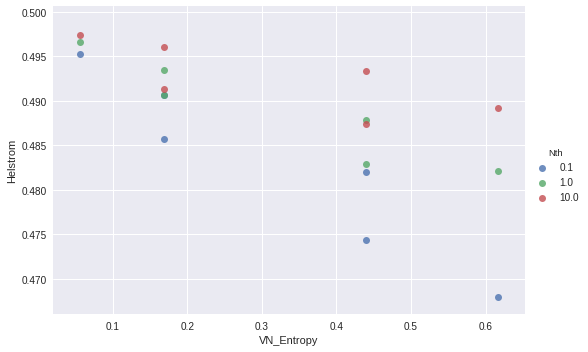

In [5]:
sns.lmplot(x='VN_Entropy', y='Helstrom', data=df_one, 
           hue='Nth', fit_reg=False, aspect=1.5)

In [6]:
def upper_bound(QCB, M):
    """ Upper bound (Quantum Chernoff bound) of the error probability
        using s = 1/2
    """
    return 0.5 * QCB ** M

In [7]:
df_temp = df_one[df_one['Nth'] == 0.1]

In [8]:
df_temp

,Nth,R,State,lambda,Aver_N,VN_Entropy,Helstrom,Chernoff,S_opt,A_N,B_N,ra,rb
0,0.1,0.01,TMSS,0.099504,0.020000,0.056102,0.495279,0.499957,0.500273,,,,
1,0.1,0.01,PS,0.099504,0.039804,0.168732,0.490605,0.499839,0.500273,,,,
2,0.1,0.01,PA,0.099504,1.039804,0.168732,0.485689,0.499632,0.498223,,,,
3,0.1,0.01,PSA,0.099504,0.150064,0.439049,0.481975,0.499450,0.500273,,,,
4,0.1,0.01,PAS,0.099504,1.150064,0.439049,0.474332,0.498892,0.499102,,,,
5,0.1,0.01,PCS,0.099504,1.750838,0.616504,0.467928,0.498262,0.499570,0.875419,0.875419,0.4,0.4


In [9]:
dict_temp = {}
for idx, name in df_temp['State'].iteritems():
    qcb = df_temp[df_temp['State'] == name]['Chernoff'].values[0] * 2
    print("{}: {}".format(name, qcb))
    dict_temp[name] = [upper_bound(qcb, n) for n in range(100, 100000, 100)]
new_df = pd.DataFrame(dict_temp, index=range(100, 100000, 100))

TMSS: 0.9999142000396576
PS: 0.9996771132318558
PA: 0.9992632374562413
PSA: 0.9989005219216288
PAS: 0.9977832246331538
PCS: 0.9965243187404256


In [10]:
df_two = pd.read_csv('../output/expr_two_p51.csv')

In [11]:
df_two.head()

,Nth,R,State,lambda,ra,rb,Aver_N,A_N,B_N,VN_Entropy,Helstrom,Chernoff,S_opt
0,0.1,0.01,PCS,0.099504,0.0,0.000000,0.079608,0.039804,0.039804,0.168732,0.490605,0.499839,0.500273
1,0.1,0.01,PCS,0.099504,0.0,0.141421,0.156538,0.039423,0.117115,0.167265,0.489210,0.499780,0.499980
2,0.1,0.01,PCS,0.099504,0.0,0.200000,0.230566,0.039057,0.191509,0.165865,0.488300,0.499726,0.499746
3,0.1,0.01,PCS,0.099504,0.0,0.244949,0.301852,0.038704,0.263148,0.164529,0.487588,0.499678,0.499512
4,0.1,0.01,PCS,0.099504,0.0,0.282843,0.370545,0.038364,0.332182,0.163252,0.486996,0.499634,0.499277


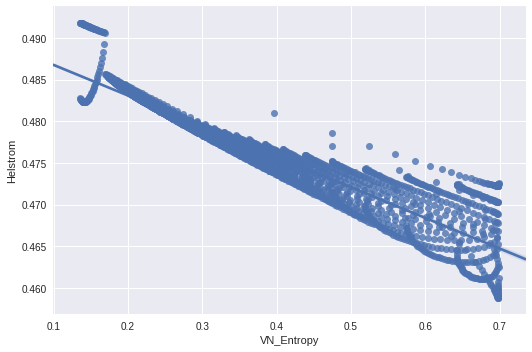

In [12]:
sns.lmplot(x='VN_Entropy', y='Helstrom', data=df_two, aspect=1.5)

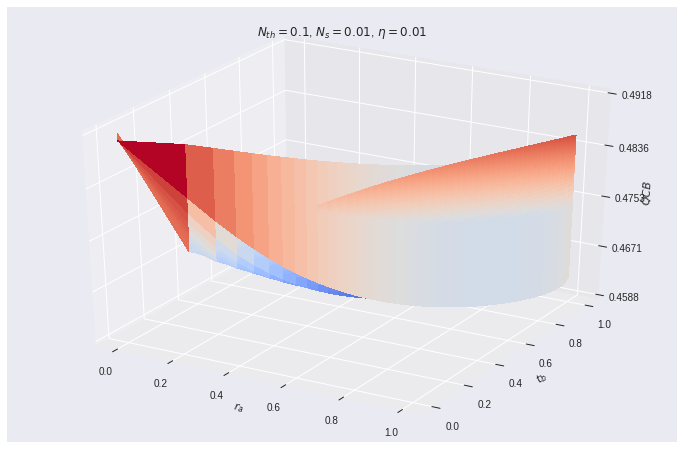

In [18]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

df_two = pd.read_csv('../output/expr_two_p51.csv')

RA = np.sqrt(np.linspace(0, 1, 51))
RB = np.sqrt(np.linspace(0, 1, 51))
RA, RB = np.meshgrid(RA, RB)
qcb_pcs = df_two['Helstrom'].values.reshape(RA.shape)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(RA, RB, qcb_pcs, \
                rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.set_xlabel('$r_a$')
ax.set_ylabel('$t_b$')
ax.set_zlabel('$QCB$')
ax.set_title('$N_{th}=0.1$, $N_s=0.01$, $\eta=0.01$')

ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.4f'))

# fig.colorbar(qcb_pcs, shrink=0.5, aspect=5)
plt.show()